In [22]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# ASTR 310 Lecture 22 - linear equations

### Exercise 1: matrix madness

**1.)** Perform the matrix multiplication.  [2 pts]

   $$
   \begin{bmatrix}
   3 & -2 & 1 \\
   6 & 0 & 4 \\
   5 & 2 & 3 \\
   \end{bmatrix}
   \begin{bmatrix}
   -1 & 4 \\
   3 & 2 \\
   7 & -4 \\
   \end{bmatrix}
   $$

In [2]:
A = np.array([
    [3, -2, 1],
    [6, 0, 4],
    [5, 2, 3]
])

B = np.array([
    [-1, 4],
    [3, 2],
    [7, -4]
])

A @ B

array([[-2,  4],
       [22,  8],
       [22, 12]])

**2.)** Find the inverse of the matrix.  [2 pts]

   $$
   \begin{bmatrix}
   3.6 & -4.1 & 1.3 & 2.5 \\
   0.4 & 6.2 & -1.5 & 3.0 \\
   5.9 & 7.0 & -3.1 & 8.2 \\
   4.8 & -5.6 & 2.9 & 7.3 \\
   \end{bmatrix}
   $$

In [5]:
A = np.array([
    [3.6, -4.1, 1.3, 2.5],
    [0.4, 6.2, -1.5, 3.0],
    [5.9, 7.0, -3.1, 8.2],
    [4.8, -5.6, 2.9, 7.3]
])

linalg.inv(A)

array([[ 0.97813868,  0.52433284, -0.17479228, -0.35411624],
       [ 0.60841088,  0.67406156, -0.25603252, -0.19777332],
       [ 1.35007366,  1.45103917, -0.70650193, -0.26506655],
       [-0.71276416, -0.40411869,  0.19918855,  0.32341375]])

**3.)** Solve the linear system and check the result.  [2 pts]

   $$
   \begin{bmatrix}
   4 & 1 & -3 & 2 \\
   0 & 7 & 5 & 1 \\
   -9 & 2 & 7 & 3 \\
   -4 & 5 & 1 & 8 \\
   \end{bmatrix}
   \begin{bmatrix}
   x_0 \\
   x_1 \\
   x_2 \\
   x_3 \\
   \end{bmatrix}
   =
   \begin{bmatrix}
   2 \\
   8 \\
   1 \\
   7 \\
   \end{bmatrix}
   $$

In [8]:
A = np.array([
    [4, 1, -3, 2],
    [0, 7, 5, 1],
    [-9, 2, 7, 3],
    [-4, 5, 1, 8]
])

b = np.array([2, 8, 1, 7])

linalg.solve(A, b)

array([-0.198,  1.514, -0.498, -0.108])

### Exercise 2: rotation

Rotating a 2D vector through an angle $\theta$ corresponds to multiplying on the left by the matrix

$$
R(\theta) = \begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$

* Create a list or an array of 2D position vectors corresponding to a 11x11 grid of points in the unit square.
* Define a function that returns the rotation matrix for a given angle $\theta$.
* Use your function to rotate the points through an angle of 25°.  Plot the original and new positions (in the same panel) using dots of different colors.

[4 pts]

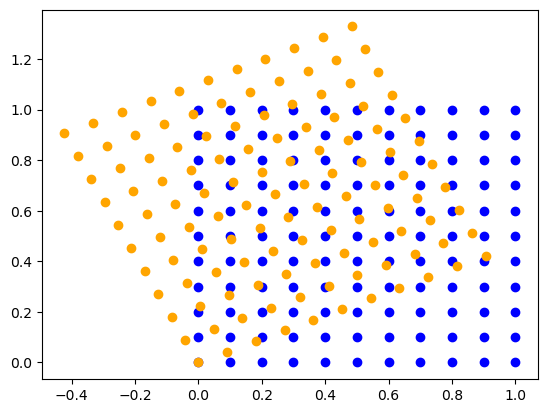

In [55]:
x, y = np.meshgrid(np.linspace(0, 1, 11), np.linspace(0, 1, 11))
position_vectors = np.stack((x, y), axis=-1).reshape(-1, 2)

def rotation_matrix(theta):
    theta = theta * np.pi / 180
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

rotated_points = rotation_matrix(25) @ position_vectors.T

plt.scatter(position_vectors[:,0], position_vectors[:,1], color='blue')
plt.scatter(rotated_points.T[:,0], rotated_points.T[:,1], color='orange')

* Now rotate about the center of the grid (0.5, 0.5) instead of the origin.

[3 pts]

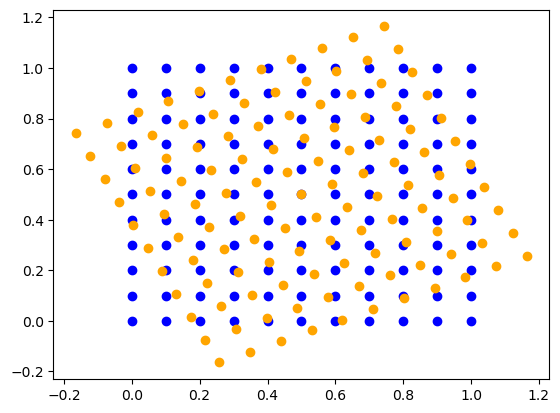

In [57]:
x, y = np.meshgrid(np.linspace(0, 1, 11), np.linspace(0, 1, 11))
position_vectors = np.stack((x, y), axis=-1).reshape(-1, 2)

def rotation_matrix(theta):
    theta = theta * np.pi / 180
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

rotated_points = (rotation_matrix(25) @ (position_vectors.T - 0.5*np.ones_like(position_vectors.T))) + 0.5*np.ones_like(position_vectors.T)

plt.scatter(position_vectors[:,0], position_vectors[:,1], color='blue')
plt.scatter(rotated_points.T[:,0], rotated_points.T[:,1], color='orange')

### Exercise 3: Chemical equilibrium

Consider a mixture of three particle species that interact via the reactions
$$
A + A \rightleftharpoons B ~~ \text{and} ~~
A + B \rightleftharpoons C.
$$
At a particular temperature, the reaction rates are such that equilibrium is described by
$$ K_{AA}\; n_A^2 = n_B/\tau_B $$
$$ K_{AB}\; n_A n_B = n_C/\tau_C.$$ 

Here the $Ks$ are the reaction rate coefficients for the forward reactions and the $\tau$'s are the decay lifetimes of species B and C.   Let $K_{AA} = 10^{–8}$ $cm^3$ $s^{–1}$ and $K_{AB} = 10^{–5}$ $cm^3$ $s^{–1}$, and $\tau_B = 100$ s and $\tau_C = 0.1$ s.  Thus, the reactions involving C are much faster than the others.

Notice that at this point we have two equations and three unknowns.  We need another constraint to be able to solve this system.  For example, we might assume the total number of particles is conserved.  If $n = n_A + n_B + n_C = 10^6$ $cm^{–3}$ (i.e. a constant), what are the equilibrium fractions $n_A/n$, $n_B/n$, and $n_C/n$? 

The system to solve can be found by eliminating $n_C$ in favor of $n_A$ and $n_B$ and $n$:

$$
\begin{bmatrix}
K_{AA} n_A & -\tau_B^{-1} \\
\tau_C^{-1} & K_{AB} n_B + \tau_C^{-1}
\end{bmatrix}
\begin{bmatrix}
\;n_A\; \\
\;n_B\;
\end{bmatrix} = 
\begin{bmatrix}
0 \\
\;n \tau_C^{-1}\;
\end{bmatrix}
$$

Hint: approach it iteratively. Start with $n_A = 10^6$ $cm^{–3}$. Solve the system for $n_A$ and $n_B$, then plug that $n_A$ into the coefficient matrix above and solve again. Keep going until the answer is consistent to one part in $10^5$.  Full credit on this one requires iterating until convergence is achieved, not just executing a fixed number of iterations.

You should get $n_A/n \approx 0.54$  and $n_B/n \approx 0.30$.

[7 pts]


In [96]:
Kaa = 1e-8
Tb = 100
Tc = 0.1
Kab = 1e-5
n = 1e6

Na_prev = 0
Na = 1e6
Nb = 0


while(abs(Na - Na_prev) > 1e-5):
    A = np.array([
        [Kaa*Na, -Tb**-1],
        [Tc**-1, Kab*Nb + Tc**-1]
    ])

    b = np.array([0, n*Tc**-1])

    ans = linalg.solve(A, b)

    Na_prev = Na
    Na = ans[0]
    Nb = ans[1]

print(Na/n)
print(Nb/n)

0.5698402909980786
0.3247179572468305
